# Map basemap of wind curl (no trajectories)

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
wind_data = Dataset('ASCAT_wind_and_curl_5yearmean.cdf')

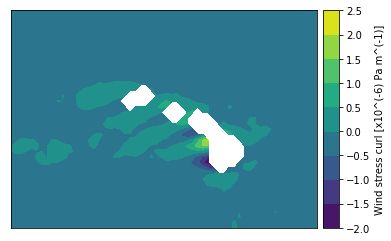

In [10]:
# Set up mapper with a Basemap of coastal boundaries for Hawaii

mapper = Basemap(projection='merc',
            llcrnrlon=194.125,
            llcrnrlat=16.125,
            urcrnrlon=208.875,
            urcrnrlat=25.875,
            resolution='l')

# Set up processing for bathymetry data
lats = wind_data.variables['LAT385_424'][:]
lons = wind_data.variables['LON1497_1556'][:]
WINDCURL_OUT = wind_data.variables['CURLM'][:] 

lons,lats= np.meshgrid(lons,lats)
x,y = mapper(lons,lats)

# Create contour object and add to the mapper
curl = mapper.contourf(x,y,WINDCURL_OUT)

# Add legend
cb = mapper.colorbar(curl, size="5%", pad="2%")
cb.set_label('Wind stress curl [x10^(-6) Pa m^(-1)]')

plt.savefig('Fig2b_SI.png', format='png', dpi=1000)
plt.show()

In [4]:
WINDCURL_OUT.shape


(40, 60)

In [5]:
x.shape

(40, 60)

In [7]:
WINDCURL_OUT[0].shape


(60,)

In [8]:
40*60

2400